# Predict whether a passenger survived or not in a Titanic crash.


In [1]:
# Import Necessary Libraries
from numpy import mean
from numpy import std
import pandas as pd, numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
sns.set()

# Data Understanding Phase

In [2]:
# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Remove unecessary columns
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [5]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
titanic.shape

(891, 8)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
# Basic statistical analysis
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check for missing values 
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Exploratory Data Analysis

##### Univariate Analysis

Out of 891 passengers 62% died in the accident


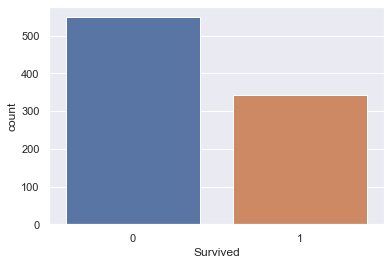

In [10]:
# Survived column
sns.countplot(x=titanic['Survived'])
percentage_of_death = round((titanic['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 passengers {}% died in the accident".format(percentage_of_death))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

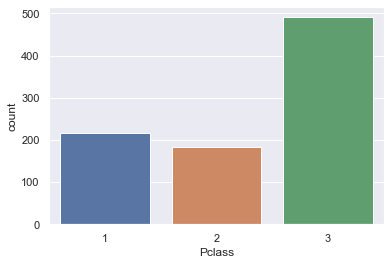

In [11]:
# Pclass column
print((titanic['Pclass'].value_counts()/891)*100)
sns.countplot(x=titanic['Pclass'])

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

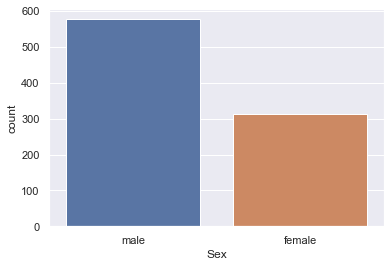

In [12]:
# Sex column
print((titanic['Sex'].value_counts()/891)*100)
sns.countplot(x=titanic['Sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

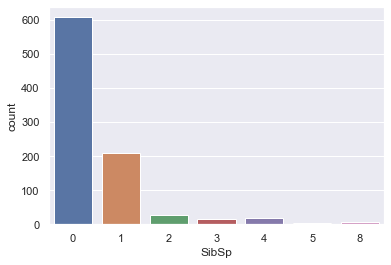

In [13]:
# SibSP
print(titanic['SibSp'].value_counts())
sns.countplot(x=titanic['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<AxesSubplot:xlabel='Parch', ylabel='count'>

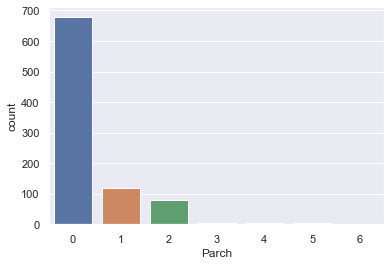

In [14]:
# Parch
print((titanic['Parch'].value_counts()/891)*100)
sns.countplot(x=titanic['Parch'])

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

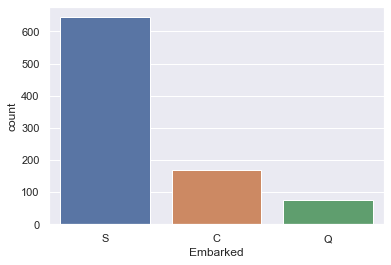

In [15]:
# Embarked column
print((titanic['Embarked'].value_counts()/891)*100)
sns.countplot(x=titanic['Embarked'])

0.38910778230082704
0.17827415364210353


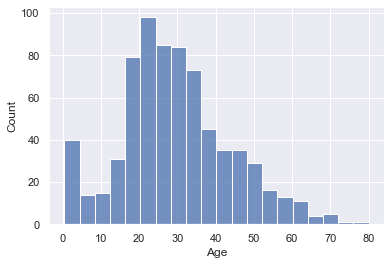

In [16]:
# Age column
sns.histplot(titanic['Age'])
print(titanic['Age'].skew())
print(titanic['Age'].kurt())

4.787316519674893
33.39814088089868


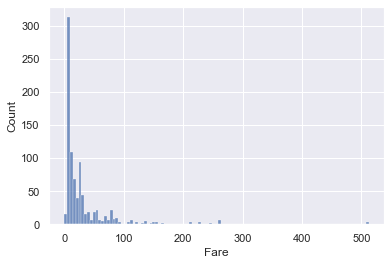

In [17]:
# Fare column
sns.histplot(titanic['Fare'])
print(titanic['Fare'].skew())
print(titanic['Fare'].kurt())

<AxesSubplot:xlabel='Fare'>

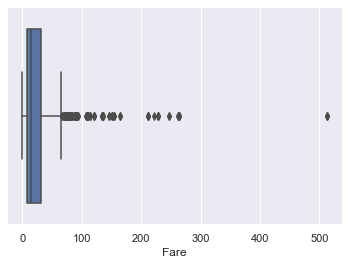

In [18]:
sns.boxplot(x=titanic['Fare'])

##### Multivariate Analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


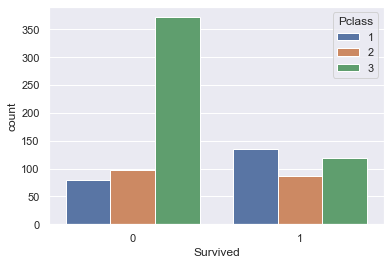

In [19]:
# Survival vs Pclass
sns.countplot(x=titanic['Survived'], hue=titanic['Pclass'])
pd.crosstab(titanic['Pclass'], titanic['Survived']).apply(lambda x: round((x/x.sum())*100, 1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


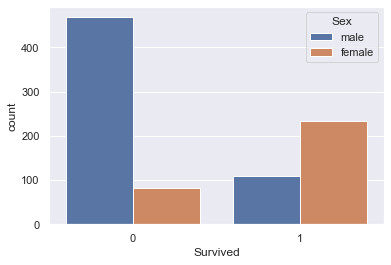

In [20]:
# Survival vs Sex
sns.countplot(x=titanic['Survived'], hue=titanic['Sex'])
pd.crosstab(titanic['Sex'], titanic['Survived']).apply(lambda x: round((x/x.sum())*100, 1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7


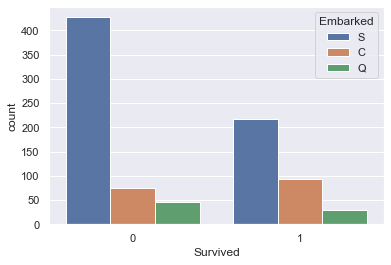

In [21]:
# Survival with Embarked
sns.countplot(x=titanic['Survived'], hue=titanic['Embarked'])
pd.crosstab(titanic['Embarked'], titanic['Survived']).apply(lambda x: round((x/x.sum())*100, 1), axis=1)

C:\Users\sediq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sediq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

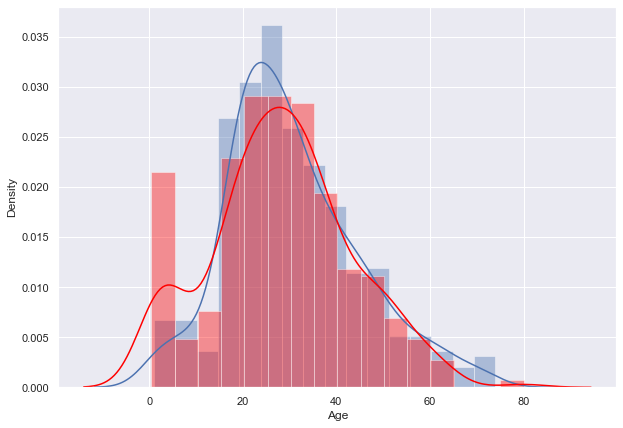

In [22]:
# Survived vs Age
plt.figure(figsize=(10, 7))
sns.distplot(titanic[titanic['Survived']==0]['Age'])
sns.distplot(titanic[titanic['Survived']==1]['Age'], color='red')

C:\Users\sediq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sediq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

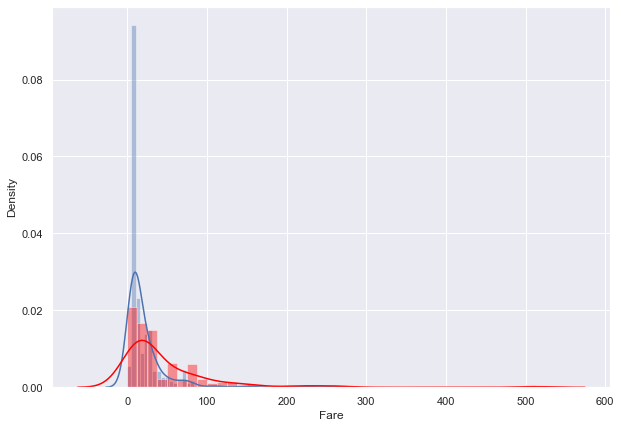

In [23]:
# Survived vs Fare
plt.figure(figsize=(10, 7))
sns.distplot(titanic[titanic['Survived']==0]['Fare'])
sns.distplot(titanic[titanic['Survived']==1]['Fare'], color='red')

# Data Preprocessing Phase

In [24]:
def split_input_output(df):
    """Function to Split Input and Output Variables"""
    # Shuffle data
    df = shuffle(df, random_state=0)
    
    # Separate Input and Ouput Variables
    X = df.drop(['Survived'], axis=1)
    y = df['Survived']
    
    # Train Test Split (I will be using 80% for training and 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
    
    # Convert X_train, X_test to dataframe and y_train, y_test to series
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)
    y_train = pd.Series(y_train)
    y_test = pd.Series(y_test)
    
    return X_train, y_train, X_test, y_test

In [25]:
X_train, y_train, X_test, y_test = split_input_output(titanic)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [27]:
def preprocess_input(X_train, X_test):
    """Function to perform Data Preprocessing"""       
    # Feature Engineering (create new column family_size by sum Parch and SibSp)
    # Then use the family_size to create new column family_size and drop unnecessary columns
    X_train['family_size'] = X_train['Parch'] + X_train['SibSp']
    X_test['family_size'] = X_test['Parch'] + X_test['SibSp']
    holder = []
    for value in X_train['family_size']:
        if value == 0:
            holder.append('Alone')
        elif value > 0 and value <=4:
            holder.append('Medium')
        else:
            holder.append('Large')
    X_train['family_type'] = holder
    holder_test = []
    for value in X_test['family_size']:
        if value == 0:
            holder_test.append('Alone')
        elif value > 0 and value <=4:
            holder_test.append('Medium')
        else:
            holder_test.append('Large')
    X_test['family_type'] = holder_test
    # drop unnecessary columns
    X_train.drop(['Parch', 'SibSp', 'family_size'], axis=1, inplace=True)
    X_test.drop(['Parch', 'SibSp', 'family_size'], axis=1, inplace=True)
    
    # Fill Age missing value using KNNImputer
    imputer = KNNImputer(n_neighbors=10)
    for column in ['Age']:
        X_train[column] = imputer.fit_transform(X_train[[column]])
        X_test[column] = imputer.transform(X_test[[column]])
    
    # Fill Embark missing values with SimpleImputer
    cat_imputer = SimpleImputer(strategy="most_frequent")
    for columns in ['Embarked']:  
         X_train[columns] = cat_imputer.fit_transform(X_train[[columns]])
         X_test[columns] = cat_imputer.transform(X_test[[columns]])
    
    # Feature encoding
    ohe = OneHotEncoder(sparse=False, drop='first')
    for columns in ['Sex', 'Embarked', 'family_type']:
        X_train_encoded = ohe.fit_transform(X_train[[columns]])
        X_test_encoded = ohe.transform(X_test[[columns]])
        encoder_feature_names = ohe.get_feature_names([columns])
        X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_feature_names)
        X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
        X_train.drop(columns, axis=1, inplace=True)
        X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_feature_names)
        X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)
        X_test.drop(columns, axis=1, inplace=True)
    
    return X_train, X_test

In [28]:
# Imputing Age column on X_train
X_train, X_test = preprocess_input(X_train, X_test)

In [29]:
X_train.isnull().sum()

Pclass                0
Age                   0
Fare                  0
Sex_male              0
Embarked_Q            0
Embarked_S            0
family_type_Large     0
family_type_Medium    0
dtype: int64

In [30]:
X_train.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,3,22.000000,9.3500,1.0,0.0,1.0,0.0,0.0
1,1,21.000000,77.2875,1.0,0.0,1.0,0.0,1.0
2,1,31.000000,113.2750,0.0,0.0,0.0,0.0,1.0
3,3,29.251192,7.7500,0.0,1.0,0.0,0.0,0.0
4,3,28.000000,7.8958,1.0,0.0,1.0,0.0,0.0


In [31]:
X_test.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,3,25.000000,7.6500,1.0,0.0,1.0,0.0,0.0
1,3,23.500000,7.2292,1.0,0.0,0.0,0.0,0.0
2,3,44.000000,16.1000,1.0,0.0,1.0,0.0,1.0
3,3,24.000000,7.0500,1.0,0.0,1.0,0.0,0.0
4,3,29.251192,7.7500,0.0,1.0,0.0,0.0,0.0


In [32]:
X_test.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,3,25.000000,7.6500,1.0,0.0,1.0,0.0,0.0
1,3,23.500000,7.2292,1.0,0.0,0.0,0.0,0.0
2,3,44.000000,16.1000,1.0,0.0,1.0,0.0,1.0
3,3,24.000000,7.0500,1.0,0.0,1.0,0.0,0.0
4,3,29.251192,7.7500,0.0,1.0,0.0,0.0,0.0


# Model Training & Evaluation Phase 

>Logistic Regression 0.805
>Decision Tree 0.767
>Support Vector Machine 0.655
>Random Forest Classifier 0.802


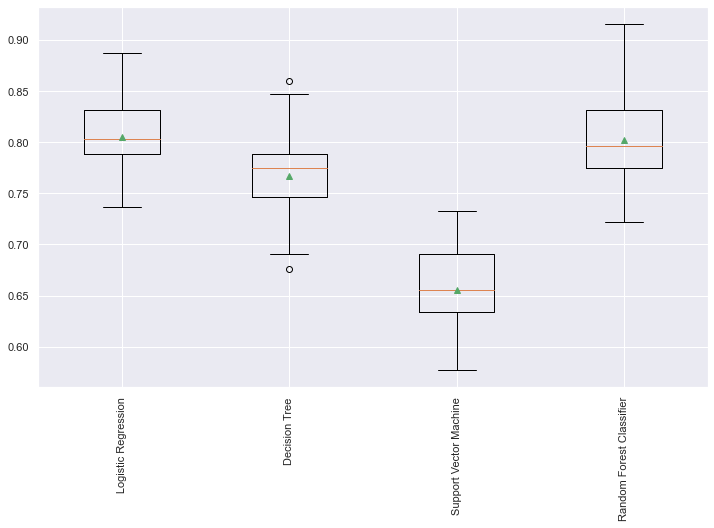

In [33]:
# get a list of models to evaluate
def models_to_train():
    models = dict()
    models['Logistic Regression'] = LogisticRegression()
    models['Decision Tree'] = DecisionTreeClassifier()
    models['Support Vector Machine'] = SVC()
    models['Random Forest Classifier'] = RandomForestClassifier()
    return models
 
# evaluate a given model using cross-validation
def model_evaluation(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# The models to evaluate
models = models_to_train()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = model_evaluation(model, X_train_trans, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f' % (name, mean(scores)))
# plot model performance for comparison
plt.figure(figsize=(12, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation='vertical')
pyplot.show()